# Курсовой проект по машинному обучению
# Анализ клиентской оттока и разработка стратегии удержания клиентов
## Использование данных о клиентах X-банка для анализа оттока и разработки стратегии удержания.


#    Описание данных.

Признаки:
    

*    RowNumber — индекс строки в данных

*    CustomerId — уникальный идентификатор клиента

*    Surname — фамилия

*    CreditScore — кредитный рейтинг

*    Geography — страна проживания

*    Gender — пол

*    Age — возраст

*    Tenure — количество недвижимости у клиента

*    Balance — баланс на счёте

*    NumOfProducts — количество продуктов банка, используемых клиентом

*    HasCrCard — наличие кредитной карты

*    IsActiveMember — активность клиента

*    EstimatedSalary — предполагаемая зарплата

Целевой признак:

*   Exited — факт ухода клиента из банка

### Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

# Импорт OneHotEncoder и OrdinalEncoder для работы с категориальными признаками
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder  

# Импорт функции train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split as tts

# Импорт StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler  

# Импорт LogisticRegression (lr) для использования логистической регрессии
from sklearn.linear_model import LogisticRegression as lr  

# Импорт DecisionTreeClassifier (dtc) для использования классификатора дерева решений
from sklearn.tree import DecisionTreeClassifier as dtc  

# Импорт RandomForestClassifier (rfc) для использования классификатора случайного леса
from sklearn.ensemble import RandomForestClassifier as rfc  

# Импорт GridSearchCV (gscv) для выполнения поиска по сетке параметров
from sklearn.model_selection import GridSearchCV as gscv  

# Импорт classification_report для вывода отчета о классификации
from sklearn.metrics import classification_report  

# Импорт f1_score для вычисления F1-меры, метрики, объединяющей точность и полноту
from sklearn.metrics import f1_score  

# Импорт roc_auc_score для вычисления площади под ROC-кривой (AUC-ROC)
from sklearn.metrics import roc_auc_score


### Предварительная обработка данных

In [2]:
import sklearn

print('Версия scikit-learn -', sklearn.__version__)



Версия scikit-learn - 1.3.2


In [4]:
# загрузим данные из пакета dataset
df = pd.read_csv('dataset/Churn_Modelling.csv') 

 # выведем на экран первые строки нашего datasetа
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# посмотрим основные статистические характеристики числовых данных с помощью метода discribe()
df.describe() 


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Приведём столбцы к нижнему регистру
df.columns = df.columns.str.lower()
# можно посмотреть общую информацию с помощью метода info()
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [2]:
# Построим общую гисnограмму для всех столбцов таблицы
df.hist(figsize=(100,100),color='cyan') 
plt.show()

NameError: name 'df' is not defined

In [8]:
# проверим наличие явных дубликатов
df.duplicated().sum() 


0

In [9]:
df['geography'].value_counts()

geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
# подсчет уникальных значений в столбце 'age'
df['age'].value_counts()

age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [11]:
# Проверим наличие неявных дубликатов в столбцах с типом object: Surname, Age,  Geography.

df['surname'].value_counts().head(50)

surname
Smith          32
Scott          29
Martin         29
Walker         28
Brown          26
Yeh            25
Shih           25
Genovese       25
Maclean        24
Wright         24
Wilson         23
White          23
Ma             23
Fanucci        23
Wang           22
Johnson        22
Moore          22
Chu            22
Lu             22
Thompson       21
Mai            21
McGregor       21
Sun            21
Kao            20
Fang           20
Watson         20
Kennedy        20
Hughes         20
Jamieson       20
Young          20
Lo             20
Graham         20
Trevisani      20
Miller         20
Palerma        20
Shen           20
Mitchell       20
Kerr           20
Tuan           19
McKay          19
Wallace        19
Anderson       19
Bergamaschi    19
Ts'ui          19
Pan            19
Crawford       19
H?             19
Pai            19
Wei            19
Gordon         19
Name: count, dtype: int64

In [12]:
# В датасете неявные дубликаты не выявлены.

In [13]:
# Посмотрим в каких столбцах, сколько пропущенных значений
df.isna().sum() 

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [14]:
# Вычисляем среднюю долю пропущенных значений в каждом столбце
df.isna().mean()

rownumber          0.0
customerid         0.0
surname            0.0
creditscore        0.0
geography          0.0
gender             0.0
age                0.0
tenure             0.0
balance            0.0
numofproducts      0.0
hascrcard          0.0
isactivemember     0.0
estimatedsalary    0.0
exited             0.0
dtype: float64

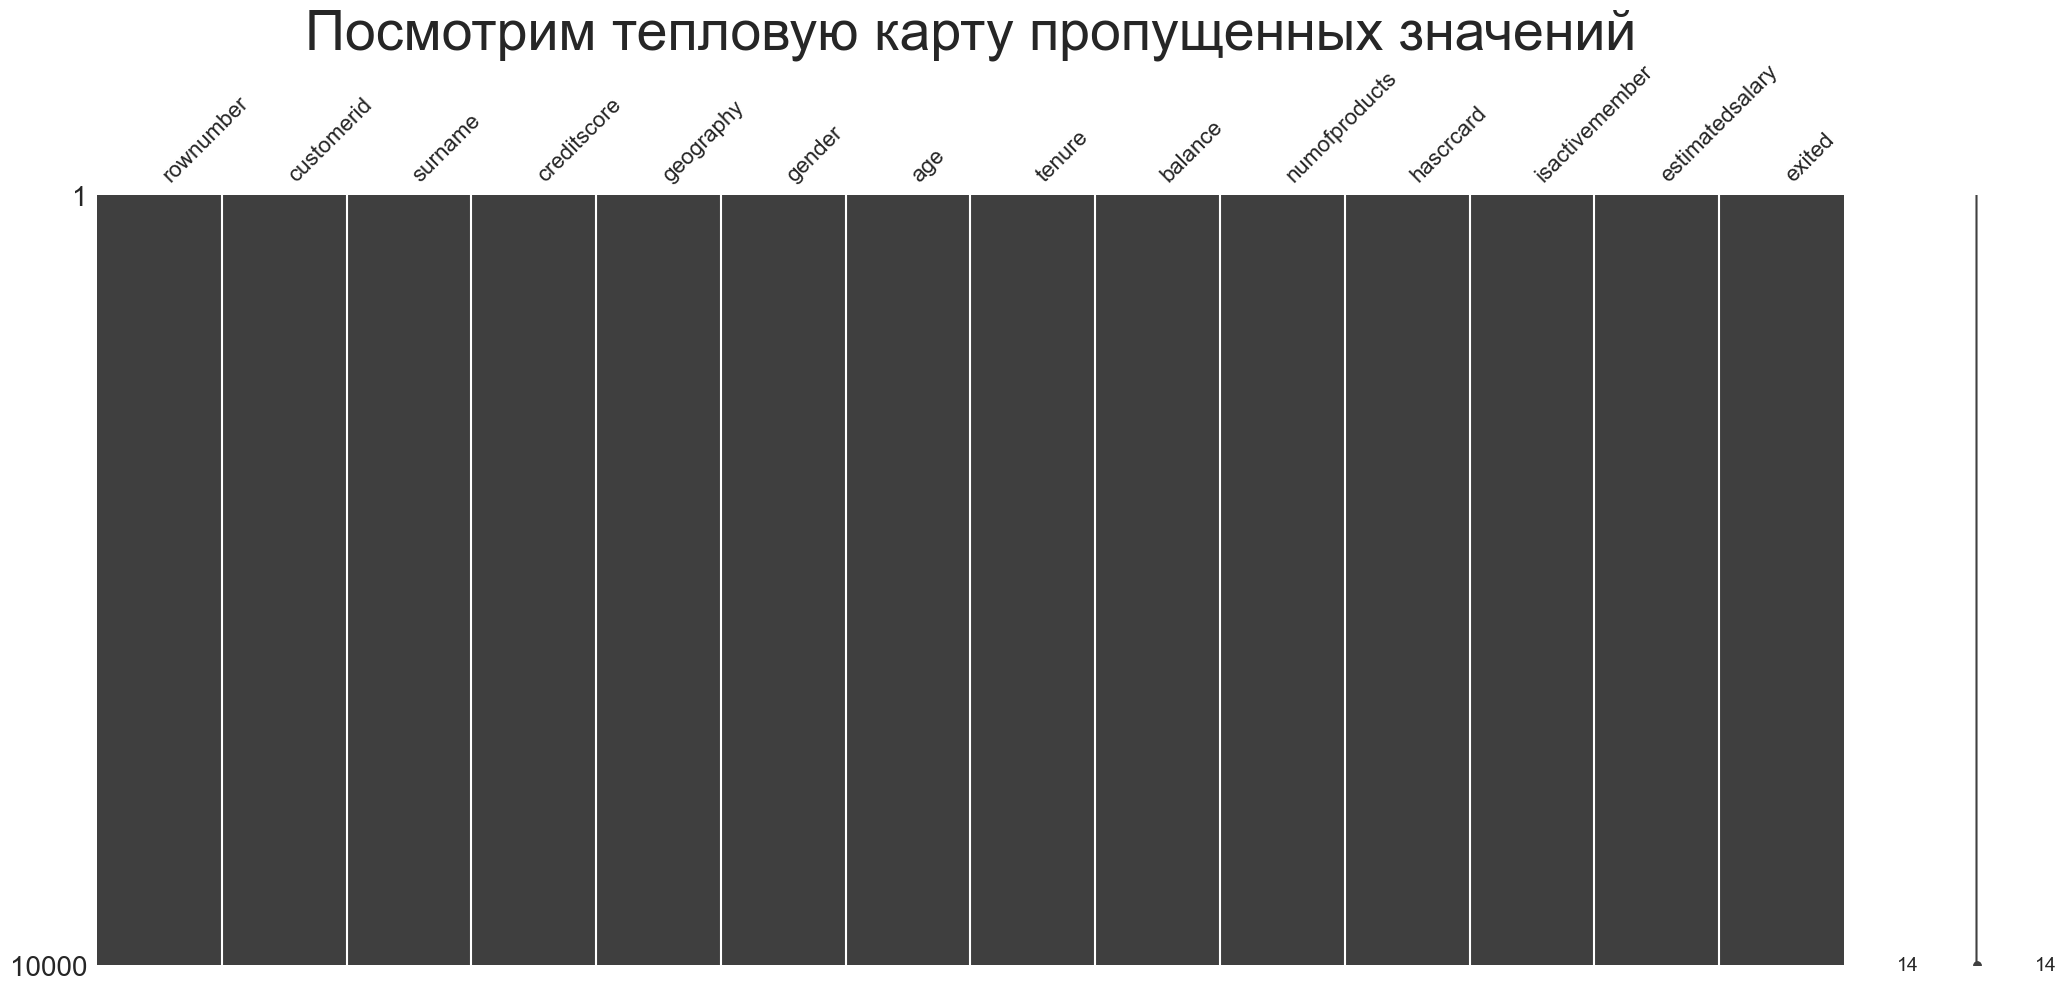

In [15]:
import missingno as miss
miss.matrix(df).set_title('Посмотрим тепловую карту пропущенных значений', fontsize=40)
plt.show()

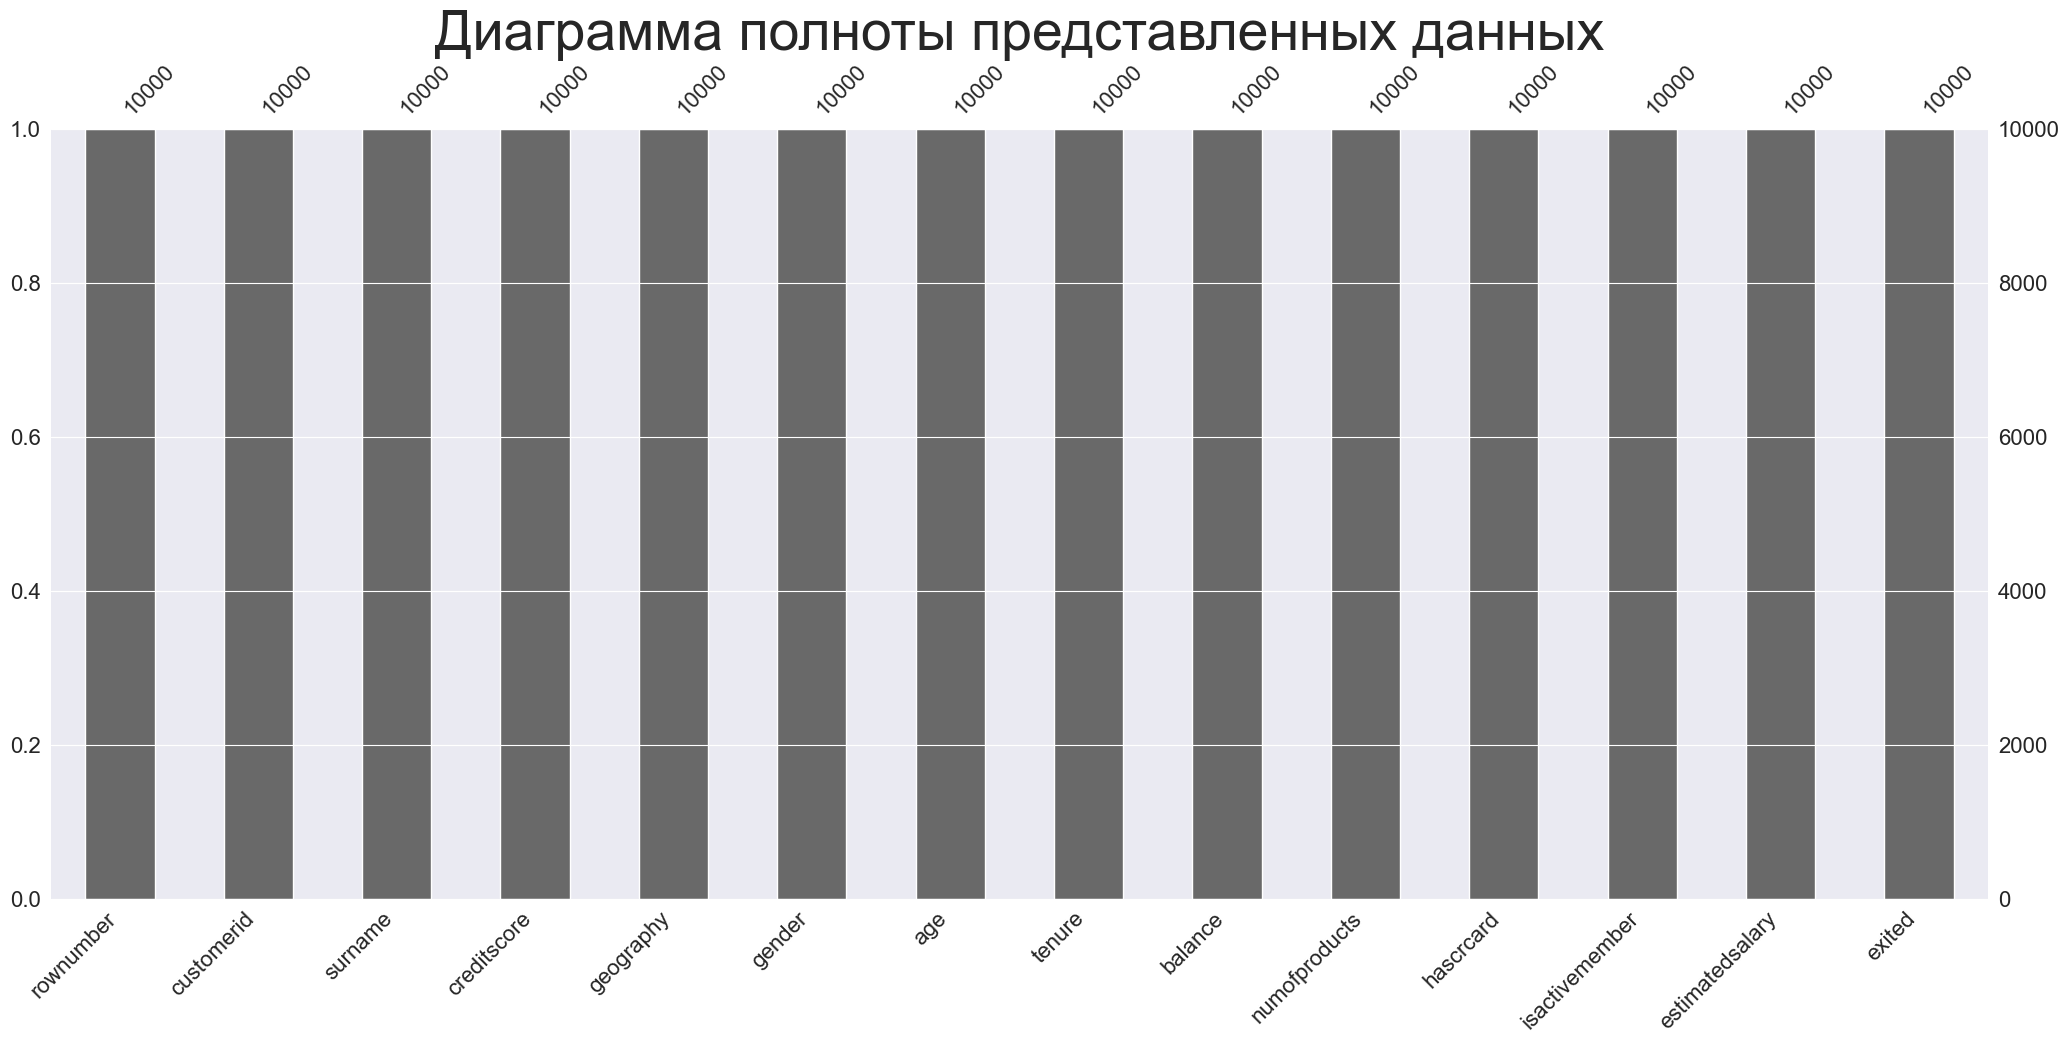

In [16]:
miss.bar(df)
plt.title('Диаграмма полноты представленных данных', fontsize=40)
plt.show()

In [17]:
# столбец creditscore
df['creditscore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: creditscore, dtype: float64

In [18]:
df['creditscore'].value_counts().head(20)

creditscore
850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
648     48
660     48
682     47
663     47
640     47
637     46
714     45
686     45
710     45
645     45
Name: count, dtype: int64

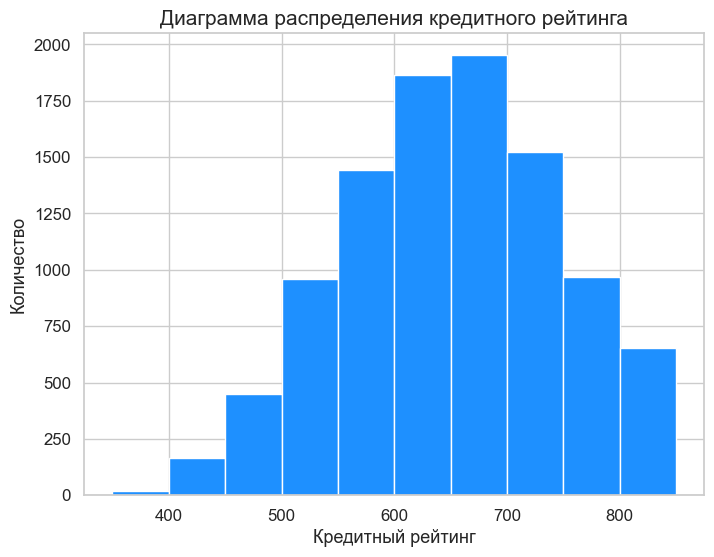

In [19]:
col = df['creditscore']
sns.set(style='whitegrid', font_scale=1.1)
col.hist( bins=10,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма распределения кредитного рейтинга', fontsize=15)
plt.xlabel('Кредитный рейтинг', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

In [20]:
# столбец Age
df['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [21]:
df['age'].value_counts().head(20)

age
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
Name: count, dtype: int64

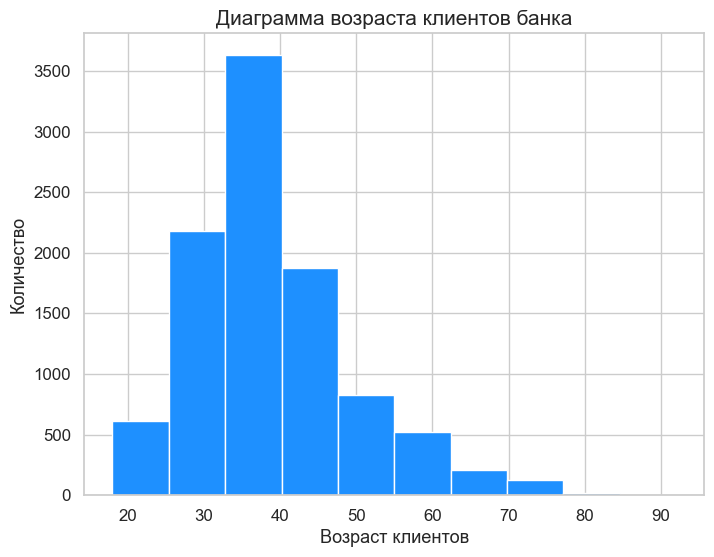

In [22]:
col = df['age']
sns.set(style='whitegrid', font_scale=1.1)
col.hist( bins=10,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма возраста клиентов банка', fontsize=15)
plt.xlabel('Возраст клиентов', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

In [23]:
# Личные данные клиента для модели не будут иметь смысла, зато будут сбивать её. Удалим столбцы customerid(уникальный номер клиента), surname(фамилия) и rownumber(индекс строки в данных):
df.drop(['customerid', 'surname', 'rownumber'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


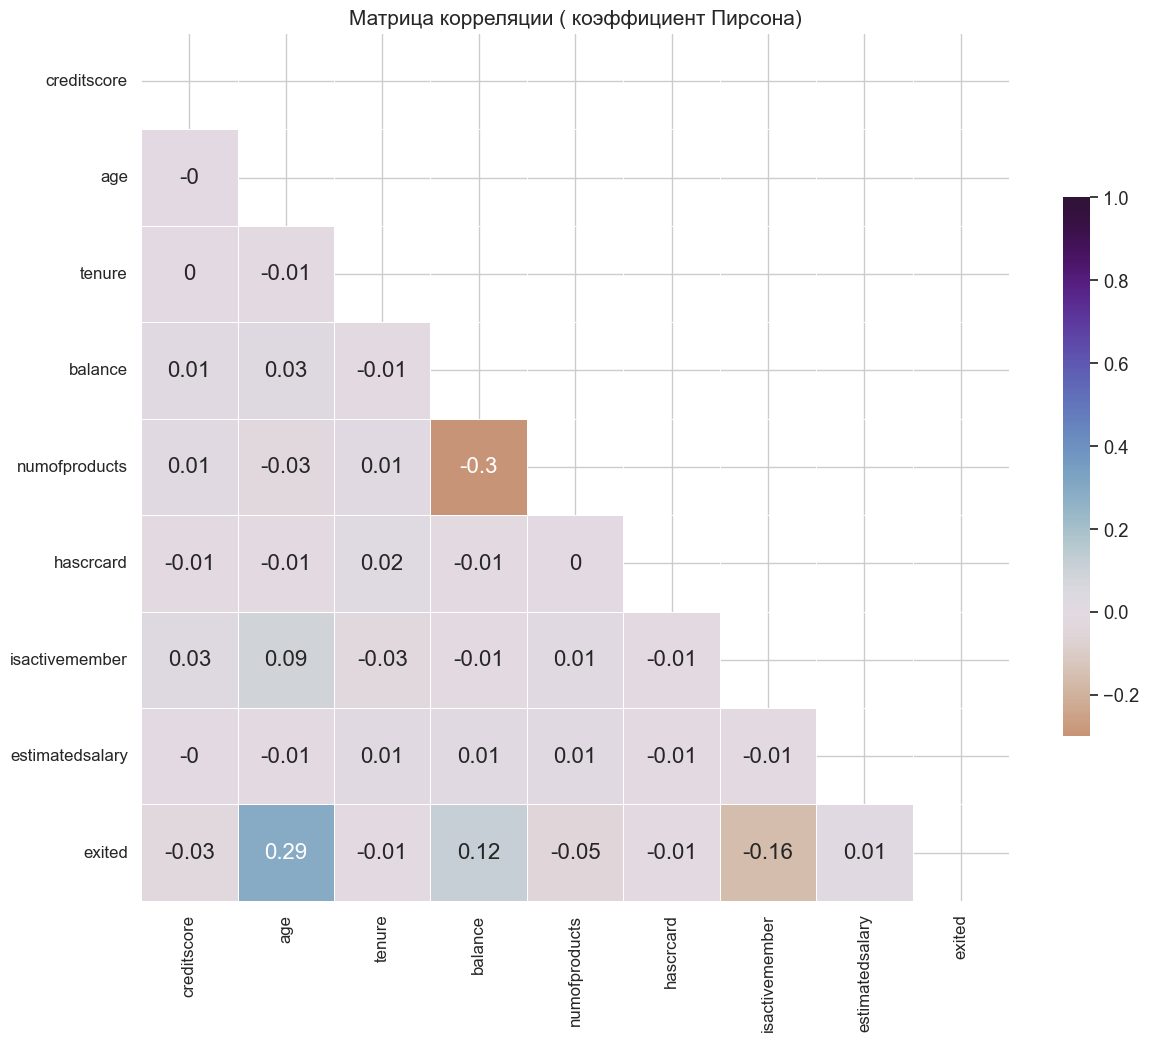

In [24]:
# Посмотрим на корреляции всех признаков
df_corr = df.drop(['geography', 'gender'], axis=1)
f, ax = plt.subplots(figsize=(14,14))
mat = df_corr.corr('pearson').round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(15, 15, as_cmap=True) 
sns.set(font_scale=1.2) 
sns.heatmap(mat, mask=mask, cmap= "twilight_shifted_r", linecolor = "white", vmax=1, center=0, annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 16}) 
plt.title('Матрица корреляции ( коэффициент Пирсона)', size=15)
plt.show()

##### Корреляция у признаков слабая. Наибольшая корреляция наблюдается с признаком Age(0.29) и Balance(0.12). 

In [25]:
# Подготовим модель с использованием прямого кодирования(ohe для логистической регрессии) и порядкового кодирования(oe для деревьев). В нашей выборке есть 2 категориальных признака:
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [27]:
# Признак gender можно сразу закодировать в основной выборке, т.к. там только 2 значения
df.loc[:, 'gender'] = (df.gender == 'Male').astype(int)
df['gender'].unique()

array([0, 1], dtype=object)

In [28]:
# Закодируем отдельную таблицу OneHotEncoder из столбца geography
ohe = OneHotEncoder()
geography_ohe = ohe.fit_transform(df[['geography']]).toarray()
geography_ohe = pd.DataFrame(geography_ohe, columns=ohe.categories_[0])
geography_ohe.head()

,France,Germany,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [29]:
# Закодируем таблицу geography, используя OrdinalEncoder
oe = OrdinalEncoder()
geography_oe = oe.fit_transform(df[['geography']])
geography_oe = pd.DataFrame(geography_oe, columns=['geography'])
geography_oe.head()

,geography
0,0.0
1,2.0
2,0.0
3,0.0
4,2.0


In [30]:
# Первоначальный столбец geography нам больше не нужен, т.к. это тип данных object, а его модели не воспринимают. Заменим его на закодированный столбец из OrdinalEncoder, и при необходимости, будем его исключать из обучения моделей

df.loc[:, 'geography'] = geography_oe.loc[:, 'geography']
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0.0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0,43,2,125510.82,1,1,1,79084.10,0


In [31]:
# Присоеденим к основной таблице закодированную таблицу с помощью OneHotEncoder:

df = df.join(geography_ohe)
df.columns = df.columns.str.lower()
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,france,germany,spain
0,619,0.0,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,2.0,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0.0,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0.0,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,2.0,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
 11  france           10000 non-null  float64
 12  germany          10000 non-null  float64
 13  spain            10000 non-null  float64
dtypes: float64(5), int64(7), object(2)
memory usage: 1.1+ MB


<Axes: >

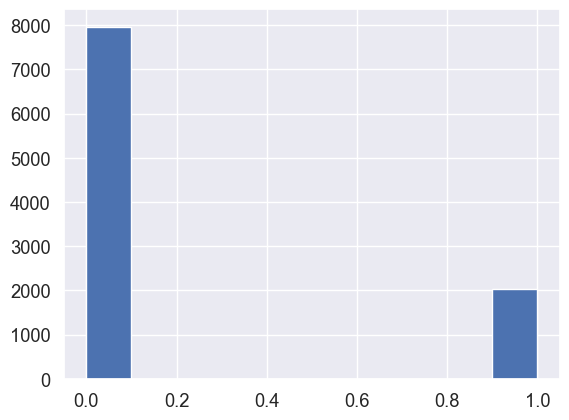

In [33]:
# Посмотрим на баланс целевого признака
df.exited.hist()

In [34]:
# С балансом наблюдаются проблемы.

# Исследование задачи



##### В нашем датасете 10000 объектов, 13 признаков ('CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'), 1 целевой признак ('Exited'). Признаки имеют тип float64(3), int64(7), object(3), целевой признак- int64. Так как предобработка данных уже проведена, пропуски и дубликаты в данных отсутствуют.

In [52]:
# Выделение признаков и целевой переменной
features = df.drop(['exited'], axis=1)
target = df['exited']

# Разделение на тренировочную и временную (валидационная + тестовая) выборки
features_train, features_valid_test, target_train, target_valid_test =  train_test_split(features, target,
                                                                           test_size=0.2, random_state=12345,
                                                                           stratify=target)

# Разделение временной выборки на валидационную и тестовую выборки
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test,
                                                               test_size=0.5, random_state=12345,
                                                               stratify=target_valid_test)


In [53]:
#Подготовим признаки для Логистической регресии:
features_train_lr = features_train.drop(['geography'], axis=1)
features_valid_lr = features_valid.drop(['geography'], axis=1)
features_test_lr = features_test.drop(['geography'], axis=1)

In [54]:
#Подготовим признаки для Деревянных моделей:
features_train_tree = features_train.drop(['france', 'germany', 'spain'], axis=1)
features_valid_tree = features_valid.drop(['france', 'germany', 'spain'], axis=1)
features_test_tree = features_test.drop(['france', 'germany', 'spain'], axis=1)

In [55]:
features_train_lr.head()    

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,france,germany,spain
3376,644,0,40,4,77270.08,2,1,1,115800.10,0.0,1.0,0.0
1315,607,0,27,5,100912.19,1,0,0,7631.27,0.0,0.0,1.0
2552,599,0,46,7,81742.84,2,1,0,83282.21,0.0,0.0,1.0
511,632,0,38,6,86569.76,2,1,0,98090.91,0.0,1.0,0.0
1888,429,1,60,7,0.00,2,1,1,163691.48,1.0,0.0,0.0


In [56]:
#Масштабируем количественные признаки для Логистической регрессии:
numeric = ['creditscore', 'age', 'balance', 'estimatedsalary']

In [57]:
# Создание объекта StandardScaler
scaler = StandardScaler()

# Обучение scaler на числовых признаках тренировочной выборки и преобразование этих признаков
scaler.fit(features_train_lr[numeric])
features_train_lr[numeric] = scaler.transform(features_train_lr[numeric])

# Преобразование числовых признаков валидационной выборки
features_valid_lr[numeric] = scaler.transform(features_valid_lr[numeric])

# Преобразование числовых признаков тестовой выборки
features_test_lr[numeric] = scaler.transform(features_test_lr[numeric])

In [58]:
#Обучим модели. Сначала Логистическую регрессию, потом Дерево решений и Случапйный лес:

#Логистическая регрессия:
model_lr = lr(random_state=12345, solver='lbfgs')

# Обучение модели на тренировочных данных
model_lr.fit(features_train_lr, target_train)

# Предсказание на валидационных данных
predicted_valid_lr = model_lr.predict(features_valid_lr)

In [59]:
print(classification_report(target_valid, predicted_valid_lr))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       796
           1       0.60      0.20      0.30       204

    accuracy                           0.81      1000
   macro avg       0.71      0.58      0.60      1000
weighted avg       0.78      0.81      0.77      1000


In [60]:
print(classification_report(target_valid, predicted_valid_lr)) 

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       796
           1       0.60      0.20      0.30       204

    accuracy                           0.81      1000
   macro avg       0.71      0.58      0.60      1000
weighted avg       0.78      0.81      0.77      1000


In [61]:
print(f1_score(target_valid, predicted_valid_lr))

0.3014705882352941


In [63]:
#Посмотрим на меру AUC-ROC:

probabilities_valid_lr = model_lr.predict_proba(features_valid_lr)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)
print(auc_roc_lr)

0.7818565868558478


In [67]:
#AUC-ROC далёк от единицы.

#Дерево решений:
#Подберём наилучшие параметры с помощью GridSearchCV:

#Разобъём выборку на тренировочную и тестовую:

features_train_gs, features_test_sd, target_train_gs, target_test_gs = tts(features, target,
                                                                           test_size=0.1, random_state=12345,
                                                                           stratify=target)

In [69]:
param_grid_dtc = {'max_depth': [depth for depth in range(4, 16)]}
gs_dtc = gscv(dtc(), param_grid=param_grid_dtc, cv=5)

In [73]:
gs_dtc.fit(features_train_gs.drop(['france', 'germany', 'spain'], axis=1), target_train_gs)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15]})

In [74]:
# Здесь мы создаем сетку параметров для дерева решений, ищем оптимальное значение max_depth.
param_grid_dtc = {'max_depth': [depth for depth in range(4, 16)]}

# Инициализируем объект GridSearchCV для дерева решений с 5-кратной кросс-валидацией.
gs_dtc = gscv(dtc(), param_grid=param_grid_dtc, cv=5)

# Объединяем тренировочные и валидационные данные, а также их целевые переменные, для кросс-валидации.
features_cv = pd.concat([features_train_tree, features_valid_tree])
target_cv = pd.concat([target_train, target_valid])

# Запускаем GridSearchCV на объединенных данных для подбора оптимального значения max_depth.
gs_dtc.fit(features_cv, target_cv)

# Выводим лучшие параметры, найденные в результате кросс-валидации.
gs_dtc.best_params_

{'max_depth': 5}

In [75]:
gs_dtc.best_params_
#{'max_depth': 5}

{'max_depth': 5}

In [76]:
#Обучим модель:
model_dtc = dtc(max_depth=5, random_state=12345)
model_dtc.fit(features_train_tree, target_train)
predicted_valid_dtc = model_dtc.predict(features_valid_tree)

In [77]:
print(classification_report(target_valid, predicted_valid_dtc))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.45      0.56       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.74      1000
weighted avg       0.84      0.85      0.84      1000


In [78]:
print(f1_score(target_valid, predicted_valid_dtc))

0.5592705167173253


In [79]:
# Здесь мы получаем вероятности принадлежности к классу "1" для валидационных данных с использованием обученной модели дерева решений.
probabilities_valid_dtc = model_dtc.predict_proba(features_valid_tree)

# Извлекаем вероятности принадлежности к классу "1".
probabilities_one_valid_dtc = probabilities_valid_dtc[:, 1]

# Вычисляем AUC-ROC для модели дерева решений на валидационных данных.
auc_roc_dtc = roc_auc_score(target_valid, probabilities_one_valid_dtc)

# Выводим значение AUC-ROC.
print(auc_roc_dtc)

0.8421888856044931


In [86]:
#AUC-ROC далёк от единицы.

#Случайный лес:
param_grid_rfc = {'max_depth': [depth for depth in range(5, 16)], 'n_estimators': [estim for estim in range(90, 150, 10)]}
gs_rfc = gscv(rfc(), param_grid=param_grid_rfc, cv=5)

In [87]:
gs_rfc.fit(features_train_gs.drop(['france', 'germany', 'spain'], axis=1), target_train_gs)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'n_estimators': [90, 100, 110, 120, 130, 140]})

In [89]:
gs_rfc.best_params_
#{'max_depth': 12, 'n_estimators': 140}

{'max_depth': 13, 'n_estimators': 140}

In [90]:
# Здесь мы создаем и обучаем модель случайного леса с определенными гиперпараметрами.
model_rfc = rfc(n_estimators=140, max_depth=12, random_state=12345)
model_rfc.fit(features_train_tree, target_train)

# Предсказываем значения на валидационных данных с использованием обученной модели случайного леса.
predicted_valid_rfc = model_rfc.predict(features_valid_tree)

In [91]:
print(classification_report(target_valid, predicted_valid_rfc))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.43      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000


In [92]:
print(f1_score(target_valid, predicted_valid_rfc))

0.555205047318612


In [93]:
# Получаем вероятности принадлежности к классу "1" для валидационных данных с использованием обученной модели случайного леса.
probabilities_valid_rfc = model_rfc.predict_proba(features_valid_tree)

# Извлекаем вероятности принадлежности к классу "1".
probabilities_one_valid_rfc = probabilities_valid_rfc[:, 1]

# Вычисляем AUC-ROC для модели случайного леса на валидационных данных.
auc_roc_rfc = roc_auc_score(target_valid, probabilities_one_valid_rfc)

# Выводим значение AUC-ROC.
print(auc_roc_rfc)

0.8675977928859987


# Борьба с дисбалансом

In [94]:
#Разделим выборку на 0 и 1:
#Единицы:

# Получаем подвыборку положительных примеров из тренировочных данных (где target_train равен 1).
features_train_up = features_train[target_train == 1]

# Выводим количество строк (количество положительных примеров) в полученной подвыборке.
features_train_up.shape[0]

1630

In [95]:
#Получаем подвыборку целевых переменных для положительных примеров из тренировочных данных (где target_train равен 1).
target_train_up = target_train[target_train == 1]

#Выводим форму (shape) полученной подвыборки, чтобы узнать количество положительных примеров.
target_train_up.shape

(1630,)

In [96]:
#Нули:
# Получаем подвыборку отрицательных примеров из тренировочных данных (где target_train равен 0).
features_train_down = features_train[target_train == 0]

# Выводим количество строк (количество отрицательных примеров) в полученной подвыборке.
features_train_down.shape[0]

6370

In [97]:
# Получаем подвыборку целевых переменных для отрицательных примеров из тренировочных данных (где target_train равен 0).
target_train_down = target_train[target_train == 0]

# Выводим форму (shape) полученной подвыборки, чтобы узнать количество отрицательных примеров.
target_train_down.shape

(6370,)

In [98]:
#Посмотрим на разницу целевого признака 0 и 1:

# Вычисляем разницу между количеством отрицательных и положительных примеров в тренировочных данных.
difference = target_train_down.shape[0] - target_train_up.shape[0]
difference

4740

#### Апсемплинг:

In [99]:
# Производим upsampling положительных примеров, чтобы сбалансировать классы.
# Для этого случайным образом выбираем примеры из подвыборки положительных примеров с возвращением (replace=True).
features_train_upsampling = features_train_up.sample(difference, replace=True)

# Выводим форму (shape) полученной увеличенной подвыборки.
features_train_upsampling.shape

(4740, 13)

In [100]:
# Объединяем увеличенную подвыборку положительных примеров с подвыборкой отрицательных примеров.
features_train_upsampling = pd.concat([features_train_upsampling, features_train_down])

# Выводим форму (shape) объединенной увеличенной подвыборки.
features_train_upsampling.shape

(11110, 13)

In [101]:
# Создаем целевую переменную для увеличенной подвыборки положительных примеров (значение 1, повторенное difference раз).
target_train_upsampling = pd.Series(np.repeat(1, difference))

# Объединяем увеличенную целевую переменную положительных примеров с целевой переменной отрицательных примеров.
target_train_upsampling = pd.concat([target_train_upsampling, target_train_down])

# Выводим форму (shape) объединенной увеличенной целевой переменной.
target_train_upsampling.shape

(11110,)

#### Даунсэмплинг:

In [102]:
# Производим downsampling отрицательных примеров, чтобы сбалансировать классы.
# Для этого случайным образом выбираем примеры из подвыборки отрицательных примеров без возвращения.
features_train_downsampling = features_train_down.sample(features_train_up.shape[0])

# Выводим форму (shape) полученной уменьшенной подвыборки.
features_train_downsampling.shape

(1630, 13)

In [103]:
# Создаем целевую переменную для уменьшенной подвыборки отрицательных примеров (значение 0, повторенное target_train_up.shape[0] раз).
target_train_downsampling = pd.Series(np.repeat(0, target_train_up.shape[0]))

# Выводим форму (shape) целевой переменной уменьшенной подвыборки.
target_train_downsampling.shape

(1630,)

In [104]:
# Объединяем уменьшенную подвыборку отрицательных примеров с подвыборкой положительных примеров.
features_train_downsampling = pd.concat([features_train_downsampling, features_train_up])

# Выводим форму (shape) объединенной уменьшенной подвыборки.
features_train_downsampling.shape

(3260, 13)

In [105]:
# Объединяем уменьшенную целевую переменную отрицательных примеров с целевой переменной положительных примеров.
target_train_downsampling = pd.concat([target_train_downsampling, target_train_up])

# Выводим форму (shape) объединенной уменьшенной целевой переменной.
target_train_downsampling.shape

(3260,)

#### Смешанный вариант:

In [106]:
#Возьмём утроенное количество единиц, и равное этому колличеству число нулей:
up_down = target_train_up.shape[0] * 3
up_down

4890

In [107]:
# Создаем увеличенную подвыборку положительных примеров с повторением (replace=True).
up = features_train_up.sample(up_down, replace=True)

# Создаем уменьшенную подвыборку отрицательных примеров без повторения.
down = features_train_down.sample(up_down)

# Объединяем увеличенную подвыборку положительных и уменьшенную подвыборку отрицательных примеров.
features_train_up_down = pd.concat([up, down])

# Выводим форму (shape) объединенной увеличенной и уменьшенной подвыборки.
features_train_up_down.shape

(9780, 13)

In [108]:
# Создаем целевую переменную для увеличенной подвыборки положительных примеров (значение 1, повторенное up_down раз).
up_t = pd.Series(np.repeat(1, up_down))

# Создаем целевую переменную для уменьшенной подвыборки отрицательных примеров (значение 0, повторенное up_down раз).
down_t = pd.Series(np.repeat(0, up_down))

# Объединяем целевую переменную увеличенной подвыборки положительных и уменьшенной подвыборки отрицательных примеров.
target_train_up_down = pd.concat([up_t, down_t])

# Выводим форму (shape) объединенной целевой переменной.
target_train_up_down.shape

(9780,)

In [109]:
#Пообучаем Случайный лес и проверим показатели:
#Сначала апсемплинг:
model_rfc_up = rfc(n_estimators=120, max_depth=10, random_state=12345)
model_rfc_up.fit(features_train_upsampling.drop(['france', 'germany', 'spain'], axis=1), target_train_upsampling)

# Предсказываем значения на валидационных данных с использованием обученной модели случайного леса.
predicted_valid_rfc_up = model_rfc_up.predict(features_valid.drop(['france', 'germany', 'spain'], axis=1))

In [110]:
# Выводим отчет о классификации для модели случайного леса с увеличенной подвыборкой.
print(classification_report(target_valid, predicted_valid_rfc_up))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       796
           1       0.63      0.64      0.63       204

    accuracy                           0.85      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.85      0.85      0.85      1000


In [111]:
# Вычисляем и выводим значение F1-меры для модели случайного леса с увеличенной подвыборкой.
best_score = {}
uped = f1_score(target_valid, predicted_valid_rfc_up)
best_score['upsampling'] = uped
print(uped)

0.632603406326034


In [112]:
# Получаем вероятности принадлежности к классу "1" для валидационных данных с использованием обученной модели случайного леса с увеличенной подвыборкой.
probabilities_valid_rfc_up = model_rfc_up.predict_proba(features_valid.drop(['france', 'germany', 'spain'], axis=1))

# Извлекаем вероятности принадлежности к классу "1".
probabilities_one_valid_rfc = probabilities_valid_rfc_up[:, 1]

# Вычисляем AUC-ROC для модели случайного леса с увеличенной подвыборкой на валидационных данных.
auc_roc_rfc_up = roc_auc_score(target_valid, probabilities_one_valid_rfc)
print(auc_roc_rfc_up)

0.8676162676125726


In [113]:
#Теперь даунсемплинг:
# Создаем и обучаем модель случайного леса с уменьшенной подвыборкой отрицательных примеров.
model_rfc_down = rfc(n_estimators=120, max_depth=10, random_state=12345)
model_rfc_down.fit(features_train_downsampling.drop(['france', 'germany', 'spain'], axis=1), target_train_downsampling)

# Предсказываем значения на валидационных данных с использованием обученной модели случайного леса с уменьшенной подвыборкой.
predicted_valid_rfc_down = model_rfc_down.predict(features_valid.drop(['france', 'germany', 'spain'], axis=1))

In [114]:
# Выводим отчет о классификации для модели случайного леса с уменьшенной подвыборкой.
print(classification_report(target_valid, predicted_valid_rfc_down))


              precision    recall  f1-score   support

           0       0.94      0.79      0.86       796
           1       0.50      0.81      0.62       204

    accuracy                           0.80      1000
   macro avg       0.72      0.80      0.74      1000
weighted avg       0.85      0.80      0.81      1000


In [115]:
# Вычисляем и выводим значение F1-меры для модели случайного леса с уменьшенной подвыборкой.
f1_score(target_valid, predicted_valid_rfc_down)

0.6191369606003753

In [116]:
# Вычисляем и выводим значение F1-меры для модели случайного леса с уменьшенной подвыборкой.
downed = f1_score(target_valid, predicted_valid_rfc_down)

# Записываем значение F1-меры в словарь best_score для уменьшенной подвыборки.
best_score['downsampling'] = downed
print(downed)

0.6191369606003753


In [117]:
# Получаем вероятности принадлежности к классу "1" для валидационных данных с использованием обученной модели случайного леса с уменьшенной подвыборкой.
probabilities_valid_rfc_down = model_rfc_down.predict_proba(features_valid.drop(['france', 'germany', 'spain'], axis=1))

# Извлекаем вероятности принадлежности к классу "1".
probabilities_one_valid_rfc_down = probabilities_valid_rfc_down[:, 1]

# Вычисляем AUC-ROC для модели случайного леса с уменьшенной подвыборкой на валидационных данных.
auc_roc_rfc_down = roc_auc_score(target_valid, probabilities_one_valid_rfc_down)
print(auc_roc_rfc_down)

0.8711264656616415


In [118]:
#Оценим модель, обученную на смешанных с увеличенной и уменьшенной подвыборкой:
model_rfc_up_down = rfc(n_estimators=120, max_depth=10, random_state=12345)
model_rfc_up_down.fit(features_train_up_down.drop(['france', 'germany', 'spain'], axis=1), target_train_up_down)

# Предсказываем значения на валидационных данных с использованием обученной модели случайного леса с увеличенной и уменьшенной подвыборкой.
predicted_valid_rfc_up_down = model_rfc_up_down.predict(features_valid.drop(['france', 'germany', 'spain'], axis=1))

In [119]:
#Посмотрим на AUC-ROC:

# Получаем вероятности принадлежности к классу "1" для валидационных данных с использованием обученной модели случайного леса с увеличенной и уменьшенной подвыборкой.
probabilities_valid_rfc_up_down = model_rfc_up_down.predict_proba(features_valid.drop(['france', 'germany', 'spain'], axis=1))

# Извлекаем вероятности принадлежности к классу "1".
probabilities_one_valid_rfc_up_down = probabilities_valid_rfc_up_down[:, 1]

# Вычисляем AUC-ROC для модели случайного леса с увеличенной и уменьшенной подвыборкой на валидационных данных.
auc_roc_rfc_up_down = roc_auc_score(target_valid, probabilities_one_valid_rfc_up_down)
print(auc_roc_rfc_up_down)

0.8646541531185339


In [120]:
# Выводим отчет о классификации для модели случайного леса с увеличенной и уменьшенной подвыборкой.
print(classification_report(target_valid, predicted_valid_rfc_up_down))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       796
           1       0.57      0.72      0.63       204

    accuracy                           0.83      1000
   macro avg       0.74      0.79      0.76      1000
weighted avg       0.85      0.83      0.84      1000


In [121]:
# Вычисляем и выводим значение F1-меры для модели случайного леса с увеличенной и уменьшенной подвыборкой.
uped_downed = f1_score(target_valid, predicted_valid_rfc_up_down)

# Записываем значение F1-меры в словарь best_score для увеличенной и уменьшенной подвыборки.
best_score['up + downsampling'] = uped_downed
print(uped_downed)

0.6320346320346321


In [122]:
# Выводим словарь с лучшими значениями F1-меры для различных стратегий балансировки классов.
print(best_score)

{'upsampling': 0.632603406326034, 'downsampling': 0.6191369606003753, 'up + downsampling': 0.6320346320346321}


In [123]:
# Выводим информацию о том, на какой стратегии балансировки классов модель показала лучший результат по F1-мере.
print(f'Лучше всего модель обучилась на выборке {max(best_score, key=best_score.get)} с показателем f1 меры {best_score.get(max(best_score, key=best_score.get))}')

Лучше всего модель обучилась на выборке upsampling с показателем f1 меры 0.632603406326034


# Тестирование модели

In [124]:
#Протестируем модель с усреднёнными данными
# Предсказываем значения на тестовых данных с использованием обученной модели случайного леса с увеличенной и уменьшенной подвыборкой.
predicted_test_rfc_up_down = model_rfc_up_down.predict(features_test.drop(['france', 'germany', 'spain'], axis=1))

In [125]:
# Выводим отчет о классификации для модели случайного леса с увеличенной и уменьшенной подвыборкой на тестовых данных.
print(classification_report(target_test, predicted_test_rfc_up_down))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       797
           1       0.57      0.71      0.63       203

    accuracy                           0.83      1000
   macro avg       0.74      0.79      0.76      1000
weighted avg       0.85      0.83      0.84      1000


In [126]:
# Вычисляем и выводим значение F1-меры для модели случайного леса с увеличенной и уменьшенной подвыборкой на тестовых данных.
print(f1_score(target_test, predicted_test_rfc_up_down))

0.6318082788671023


In [127]:
# Получаем вероятности принадлежности к классу "1" для тестовых данных с использованием обученной модели случайного леса с увеличенной и уменьшенной подвыборкой.
probabilities_valid_rfc_up_down_test = model_rfc_up_down.predict_proba(features_test.drop(['france', 'germany', 'spain'], axis=1))

# Извлекаем вероятности принадлежности к классу "1".
probabilities_one_valid_rfc_up_down_test = probabilities_valid_rfc_up_down_test[:, 1]

# Вычисляем AUC-ROC для модели случайного леса с увеличенной и уменьшенной подвыборкой на тестовых данных.
auc_roc_rfc_up_down_test = roc_auc_score(target_test, probabilities_one_valid_rfc_up_down_test)
print(auc_roc_rfc_up_down_test)

0.8649986711250935


In [128]:
#Протестируем модель с апсемплингом:
predicted_test_rfc_up = model_rfc_up.predict(features_test.drop(['france', 'germany', 'spain'], axis=1))
print(f1_score(target_test, predicted_test_rfc_up))

0.6295399515738499


In [129]:
# Получаем вероятности принадлежности к классу "1" для тестовых данных с использованием обученной модели случайного леса с увеличенной подвыборкой.
probabilities_valid_rfc_up_test = model_rfc_up.predict_proba(features_test.drop(['france', 'germany', 'spain'], axis=1))

# Извлекаем вероятности принадлежности к классу "1".
probabilities_one_valid_rfc_up_test = probabilities_valid_rfc_up_test[:, 1]

# Вычисляем AUC-ROC для модели случайного леса с увеличенной подвыборкой на тестовых данных.
auc_roc_rfc_up_test = roc_auc_score(target_test, probabilities_one_valid_rfc_up_test)
print(auc_roc_rfc_up_test)


0.8620998695848346


# Общий вывод
###### Были проанализированы и подготовлены данные «X-Банка». Обучены модели без учёта дисбаланса классов. Произведены 3 вида балансировки классов и заново обучены модели. Показатели f1 меры улучшились значительно с 0.54 до 0.64 - слабовато. AUC-ROC сильно не менялся, но ответы модели далеки от случайных на разных вариантах этой самой балансировки. Проведено финальное тестирование, на котором показатель f1 снизился до 0.63.